In [1]:
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\train.csv")

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [5]:
df.duplicated().any()

False

In [6]:
x=df.sample(1)

In [7]:
x

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
24520,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


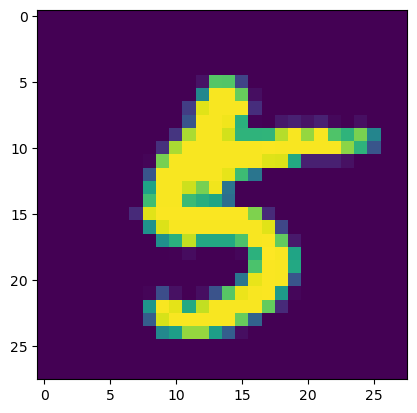

In [8]:
plt.imshow(df.iloc[27385,1:].values.reshape(28,28))

In [9]:
y=df.sample(1)

In [10]:
y

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25667,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


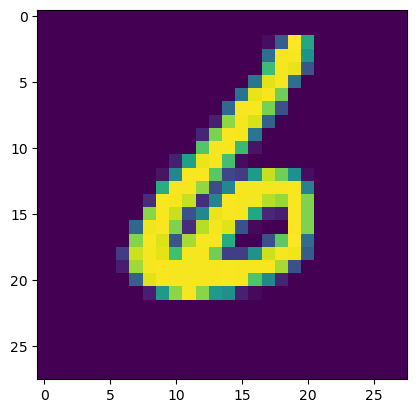

In [11]:
plt.imshow(df.iloc[4520,1:].values.reshape(28,28))

In [12]:
X=df.iloc[:,1:]

In [13]:
y=df['label']

In [14]:
X.shape

(42000, 784)

In [15]:
y.shape

(42000,)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train.shape

(33600, 784)

In [19]:
X_test.shape

(8400, 784)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn=KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
y_pred=knn.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
a=accuracy_score(y_test,y_pred)

In [26]:
a

0.9648809523809524

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()

In [29]:
pca=PCA()

In [30]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [31]:
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [32]:
X_train_pca.shape

(33600, 784)

In [33]:
p=PCA(n_components=100)

In [34]:
X_train_p=p.fit_transform(X_train)
X_test_p=p.transform(X_test)

In [35]:
X_train_p.shape

(33600, 100)

In [36]:
X_test_p.shape

(8400, 100)

In [37]:
Knn=KNeighborsClassifier(n_neighbors=5)

In [38]:
Knn.fit(X_train_p,y_train)

KNeighborsClassifier()

In [39]:
y_pred_p=Knn.predict(X_test_p)

In [40]:
a2=accuracy_score(y_test,y_pred_p)

In [41]:
a2

0.9529761904761904

In [ ]:
ax=[]
for i in range(1,785):
    pca=PCA(n_components=i)
    X_train_abc=pca.fit_transform(X_train)
    X_test_abc=pca.transform(X_test)
    k=KNeighborsClassifier(n_neighbors=5)
    k.fit(X_train_abc,y_train)
    y_prediction=k.predict(X_test_abc)
    a=accuracy_score(y_test,y_prediction)
    print(a)
    ax.append(y_prediction)

0.25821428571428573
0.32392857142857145
0.5104761904761905
0.6661904761904762
0.7377380952380952
0.8227380952380953
0.8430952380952381
0.8722619047619048
0.8866666666666667
0.9061904761904762
0.9114285714285715
0.9183333333333333
0.9280952380952381
0.935
0.9391666666666667
0.9379761904761905
0.9414285714285714
0.9414285714285714
0.9421428571428572
0.9432142857142857
0.9441666666666667
0.9445238095238095
0.9445238095238095
0.9444047619047619
0.9466666666666667
0.9489285714285715
0.9470238095238095
0.9477380952380953
0.95
0.9497619047619048
0.950952380952381
0.9498809523809524
0.9514285714285714
0.9516666666666667
0.9515476190476191
0.9526190476190476
0.9520238095238095
0.9523809523809523
0.9533333333333334
0.9533333333333334
0.9525
0.9527380952380953
0.9533333333333334
0.9528571428571428
0.9530952380952381
0.9535714285714286
0.9529761904761904
0.954047619047619
0.9533333333333334
0.9532142857142857
0.9541666666666667
0.9547619047619048
0.9533333333333334
0.954047619047619
0.954285714285